# COFEE SALES DATASET

**75 % DE FINALIZACION DEL CODIGO, AÚN ME FALTA AGREGAR COSAS**

**Introducction**

**[ESP]**
Este dataframe contiene registros detallados de ventas de cafe para una maquina expendedora. Está realizada para análisis de patrones de compras, ventas, tendencias y preferencias relacionadas con las preferencia de los consumidores.

**[ENG]**
This dataset contains detailed records of coffee sales from a vending machine. It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products.
he dataset spans from March 2024 to June 2024, capturing daily transaction data

**Objectives**

**[ENG]** Utilize visualizations to explore and uncover patterns in coffee sales, aiming to understand consumption trends, customer preferences, and preferred payment methods. This analysis seeks to provide a clear and comprehensible representation of the data, facilitating the identification of insights for the reader.

The project will use visualization tools such as Seaborn and Matplotlib to create charts. This approach not only enhances the interpretation of consumer behaviors but also demonstrates key skills in data analysis and visualization.

**[ESP]** Utilizar visualzaciones para explorar y descubrir patrones en las ventas de café, con el fin de entender tendencias de consumos, preferencias y/o el metodo de pago preferido. Este analisis busca porporcionar una representación clara y comprensible de los datos, facilitando la identificación de insights al lector.

El proyecto utilizará herramientas como seaborn y matplotlib para crear gráficos. Este enfoque no solo mejora la interpretación de los comportamientos de consumo, sino que también demuestra habilidades clave en análisis y visualización de datos.

In [415]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# 1. **[ENG]** Loading the dataframe  // **[ESP]** Cargando los datos

In [416]:
# Loading the dataset
df = pd.read_csv('/index.csv')


# 1.1 **[ENG]** Inspecting data // **[ESP]** Inspeccionar los datos

In [417]:
df.head()


,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [418]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


**[ENG]**

- There are 6 features, 2 of them are datetime features but now are currently object types.
- The coffee_name column seems to be a categorical column, so it need to be handled accordingly
- The rest of the columns are ok.
- There are 896 rows.

**[ESP]**

- Existen 6 columnas de las cuales 2 del tipo datetime pero actualmente son del tipo object.
- La columna coffe_name parece ser una columna categorica por lo que debe ser manejado correctamente.
- El resto de las columnas se encuentran bien.
- Hay 896 filas


In [419]:
df.describe()

,money
count,896.000000
mean,34.143906
std,4.573951
min,23.020000
25%,28.900000
50%,34.500000
75%,37.720000
max,40.000000


# 2. **[ENG]** Data Cleaning // **[ES]** Limpieza de Datos


## 2.1 **[ENG]** Identifying and handling missing values // **[ESP]** Identificando y manejando valores nulos

In [420]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

**[ENG]**

- There are 89 NA records in the card column. If we look at the dataframe above its clear thoese NA values are indeed a diferent cash_type



**[ESP]**

- Existen 89 registros NA en la columna card. Si miramos arriba, está claro que estos valores deben pertenecer a otro tipo de cash que debe ser el efectivo


In [421]:
df['cash_type'].value_counts()

cash_type
card    807
cash     89
Name: count, dtype: int64

In [422]:
df[df['cash_type'] == 'cash']

,date,datetime,cash_type,card,money,coffee_name
12,2024-03-02,2024-03-02 10:30:35.668,cash,NaN,40.0,Latte
18,2024-03-03,2024-03-03 10:10:43.981,cash,NaN,40.0,Latte
41,2024-03-06,2024-03-06 12:30:27.089,cash,NaN,35.0,Americano with Milk
46,2024-03-07,2024-03-07 10:08:58.945,cash,NaN,40.0,Latte
49,2024-03-07,2024-03-07 11:25:43.977,cash,NaN,40.0,Latte
...,...,...,...,...,...,...
657,2024-05-31,2024-05-31 09:23:58.791,cash,NaN,39.0,Latte
677,2024-06-01,2024-06-01 20:54:59.267,cash,NaN,39.0,Cocoa
685,2024-06-02,2024-06-02 22:43:10.636,cash,NaN,34.0,Americano with Milk
691,2024-06-03,2024-06-03 21:42:51.734,cash,NaN,34.0,Americano with Milk


Por lo que para quitar estos nulos reemplazaremos estos nan por otro dato

In [423]:
df.loc[df['card'].isna(), 'card']='Cash'

In [424]:
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

## 2.2 **[ENG]** Correcting and transforming data types //**[ESP]** Corregir y transformar tipos de datos

### 2.2.1 **[ENG]** Making the two dates columns to datetime dtype// **[ESP]** Haciendo las dos columnas de fechas al tipo datetime

In [425]:
# Making these columns to datetime
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [426]:
# Checking for null data
df.isna().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

### 2.2.2 **[ENG]** Making coffe_name column to categorical // **[ESP]** Haciendo la columna coffee_name categorica

In [427]:
df['coffee_name'].value_counts()

coffee_name
Americano with Milk    203
Latte                  187
Cappuccino             164
Americano              133
Cortado                 85
Hot Chocolate           63
Espresso                35
Cocoa                   26
Name: count, dtype: int64

**[ENG]**
- There are 8 diferent coffee categories.
- The most sell coffee is Americano with milk and the last is Cocoa.

**[ESP]**
- Existen 8 categorias diferentes de cafe.
- El más vendido es Americano con leche y el menos Cocoa.

In [428]:
df['coffee_name'] = df['coffee_name'].astype('category')

In [429]:
# Checking for diferent payment method
df['cash_type'].value_counts()

cash_type
card    807
cash     89
Name: count, dtype: int64

### 2.2.3 **[ENG]** Transform data to make the dataset more understandable // **[ESP] **Transformar los datos para hacer el dataset más entendible


In [430]:
df

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte
...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate


In [431]:
# Creating new columns
df['hour_day'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday
df['month'] = df["date"].dt.to_period("M")
df['week'] = df["date"].dt.to_period("W")

In [432]:
# Making a dict to replace the weekdays numbers
week_days = {0:'Monday', 1:'Tuesday',
             2:'Wednesday', 3:'Thursday',
            4:'Friday',5:'Saturday', 6:'Sunday'}

In [433]:
df['weekday'] = df['weekday'].map(week_days)

In [434]:
# Showing the features Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         896 non-null    datetime64[ns]
 1   datetime     896 non-null    datetime64[ns]
 2   cash_type    896 non-null    object        
 3   card         896 non-null    object        
 4   money        896 non-null    float64       
 5   coffee_name  896 non-null    category      
 6   hour_day     896 non-null    int32         
 7   weekday      896 non-null    object        
 8   month        896 non-null    period[M]     
 9   week         896 non-null    period[W-SUN] 
dtypes: category(1), datetime64[ns](2), float64(1), int32(1), object(3), period[M](1), period[W-SUN](1)
memory usage: 60.9+ KB


In [435]:
df

,date,datetime,cash_type,card,money,coffee_name,hour_day,weekday,month,week
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.70,Latte,10,Friday,2024-03,2024-02-26/2024-03-03
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,Friday,2024-03,2024-02-26/2024-03-03
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.70,Hot Chocolate,12,Friday,2024-03,2024-02-26/2024-03-03
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.90,Americano,13,Friday,2024-03,2024-02-26/2024-03-03
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.70,Latte,13,Friday,2024-03,2024-02-26/2024-03-03
...,...,...,...,...,...,...,...,...,...,...
891,2024-06-29,2024-06-29 21:27:22.449,card,ANON-0000-0000-0009,37.72,Latte,21,Saturday,2024-06,2024-06-24/2024-06-30
892,2024-06-30,2024-06-30 10:28:09.842,card,ANON-0000-0000-0336,37.72,Latte,10,Sunday,2024-06,2024-06-24/2024-06-30
893,2024-06-30,2024-06-30 13:05:50.620,card,ANON-0000-0000-0337,23.02,Espresso,13,Sunday,2024-06,2024-06-24/2024-06-30
894,2024-06-30,2024-06-30 16:54:41.679,card,ANON-0000-0000-0009,37.72,Hot Chocolate,16,Sunday,2024-06,2024-06-24/2024-06-30


In [436]:
# Checking if any transformation create null values
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
hour_day       0
weekday        0
month          0
week           0
dtype: int64

# 3. **[ENG]** Exploratory Data Analysis (EDA) //**[ESP]** Análisis Exploratorio de Datos (EDA)

## 3.1 [ENG] GROUPING THE DATAFRAME / [ESP] AGRUPANDO EL DATAFRAME

In [437]:
# Grouping the dataframe by date 
df_groupped_by_date = df.groupby(['date'])[['money', 'coffee_name']].agg({'money': 'sum', 'coffee_name': 'count'})

# Renaming the resulting columns
df_groupped_by_date = df_groupped_by_date.rename(columns={'coffee_name': 'coffee_count', 'money': 'money_per_day'})
df_groupped_by_date

,money_per_day,coffee_count
date,,
2024-03-01,396.30,11
2024-03-02,228.10,7
2024-03-03,349.10,10
2024-03-04,135.20,4
2024-03-05,338.50,9
...,...,...
2024-06-26,196.92,6
2024-06-27,131.28,4
2024-06-28,159.20,5


## 3.2. [ENG] EXPLORATION ANALYSIS / [ESP] ANÁLISIS EXPLORATIVO

In [438]:
df.describe()

,date,datetime,money,hour_day
count,896,896,896.000000,896.000000
mean,2024-05-03 07:33:12.857143040,2024-05-03 22:41:14.023023104,34.143906,14.651786
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,23.020000,7.000000
25%,2024-04-04 00:00:00,2024-04-04 12:09:13.764750080,28.900000,11.000000
50%,2024-05-11 00:00:00,2024-05-11 17:11:37.023000064,34.500000,14.000000
75%,2024-06-01 00:00:00,2024-06-01 12:20:50.463000064,37.720000,18.000000
max,2024-06-30 00:00:00,2024-06-30 21:04:09.746000,40.000000,22.000000
std,NaN,NaN,4.573951,3.868994


- Los datos van desde el **01-03-2024** hasta **30-06-2024**, por lo que son alrededor de 3 meses de datos.
- El promedio de venta es de \$33.96.
- El máximo de ventas es 38.7y el mínimo es de 23.
- A las 14 hrs es cuando más se vende, mientras que a las 18 hrs es cuando se concentra la mayor cantidad de público para consumir en el café.


**Total sales**

In [439]:
print(f'Total Sales are {df["money"].sum()}')

Total Sales are 30592.940000000002


**Month Sales**

In [440]:
month_sales = df.groupby('month')['money'].sum()
month_sales

month
2024-03    7050.20
2024-04    6720.56
2024-05    9063.42
2024-06    7758.76
Freq: M, Name: money, dtype: float64

<Axes: title={'center': 'Sales by Month'}, xlabel='month'>

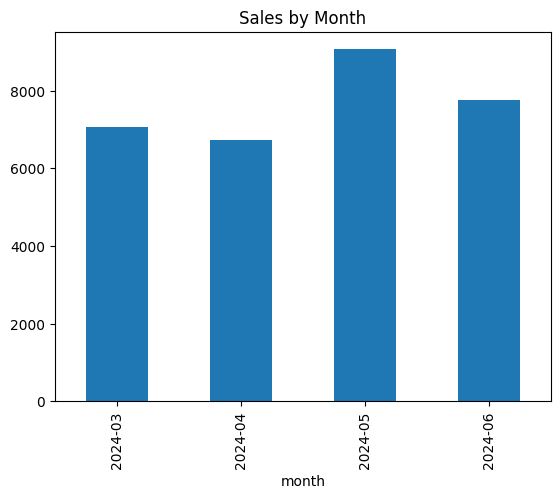

In [518]:
month_sales.plot(kind='bar', title='Sales by Month')

**[ENG]**

- The 3rd and 4th week are the best in sales


**[ESP]**

- La tercer y cuarta semana son las semanas donde más se vendió cafe

**Week Sales**

In [442]:
week_sales = df.groupby('week')['money'].sum()
week_sales

week
2024-02-26/2024-03-03     973.50
2024-03-04/2024-03-10    1840.50
2024-03-11/2024-03-17    1516.30
2024-03-18/2024-03-24    1307.80
2024-03-25/2024-03-31    1412.10
2024-04-01/2024-04-07    1434.50
2024-04-08/2024-04-14    1666.00
2024-04-15/2024-04-21    1838.84
2024-04-22/2024-04-28    1251.20
2024-04-29/2024-05-05     890.18
2024-05-06/2024-05-12    1705.80
2024-05-13/2024-05-19    2180.26
2024-05-20/2024-05-26    2811.80
2024-05-27/2024-06-02    2605.00
2024-06-03/2024-06-09    2143.52
2024-06-10/2024-06-16    1835.98
2024-06-17/2024-06-23    1911.42
2024-06-24/2024-06-30    1268.24
Freq: W-SUN, Name: money, dtype: float64

<Axes: title={'center': 'Sales by week'}, xlabel='week'>

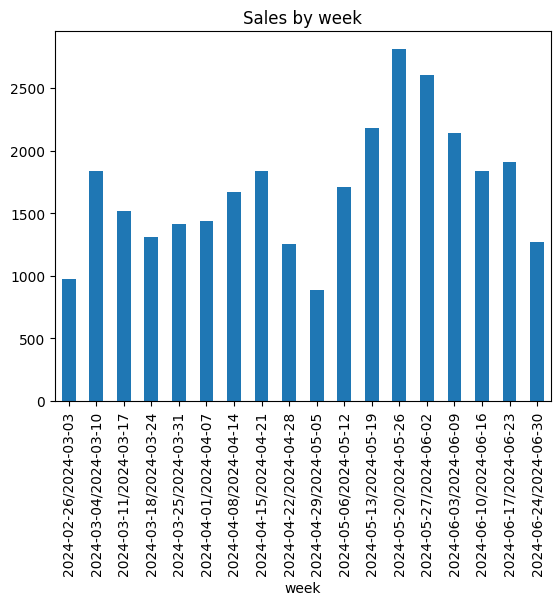

In [443]:
week_sales.plot(kind='bar', title='Sales by week'
               )

**[ENG]**



**[ESP]**

- Es interesante que en la semana 2024-04-15/2024-04-2021 comienza una bajada en las ventas que llega su peak en la semana 2024-04-29/2024-05-15 donde alcanza su peor cifra de ventas.
- Posterior a lo anterior se ve un aumento considerable en las ventas que llega su peak en la semana 2024-05-20-/2024-05-26 donde tambien comienza a bajar posterior a esto

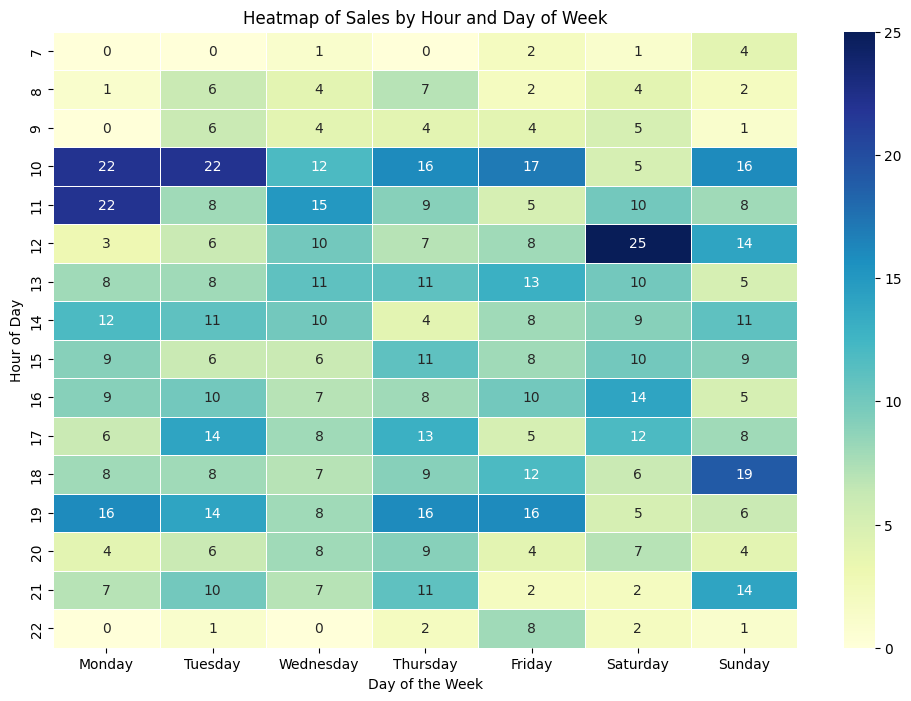

In [444]:
pivot_table = df.pivot_table(index='hour_day', columns='weekday', values='money', aggfunc='count', fill_value=0)

# Ordering the days of the week for the heatmap
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table = pivot_table[ordered_days]

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Heatmap of Sales by Hour and Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of Day')
plt.show()

In [445]:
df_groupped_by_date.describe()

,money_per_day,coffee_count
count,119.000000,119.000000
mean,257.083529,7.529412
std,116.404806,3.414385
min,37.720000,1.000000
25%,169.000000,5.000000
50%,242.800000,7.000000
75%,342.140000,10.000000
max,575.400000,17.000000


**[ENG]**
- We have 119 days with an average of \$257 in sales and 7 coffees sold per day.
- The standard deviation is equally large, indicating that the business has fluctuating sales.
- There are days where only one coffee might be sold.
- More than 75% of the data shows daily earnings of \$342 or less.
- The highest daily sales were \$536.


**[ESP]**

- Tenemos 119 días de los cuales en promedio se vendió \$ 230, con una cantidad promedio de cafés de 7.
- La variación estándar es igual de grande, por lo que el negocio tiene ventas fluctuantes.
- Existen días donde incluso se puede vender solo 1 café.
- Más del 75 % de los datos se encuentra con ganancias diarias menores o iguales a \$ 310.
- La mayor venta del día fueron \$ 536.

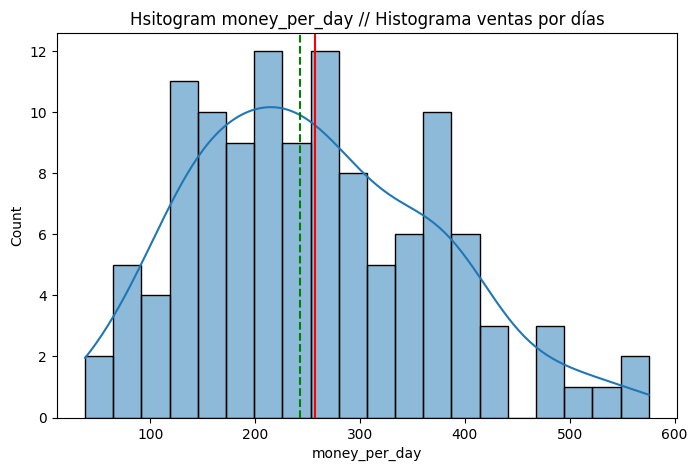

In [446]:
plt.figure(figsize=(8, 5))
sns.histplot(data= df_groupped_by_date, x='money_per_day', bins=20, kde=True)
plt.axvline(df_groupped_by_date['money_per_day'].median(), color = 'green', linestyle='--')
plt.axvline(df_groupped_by_date['money_per_day'].mean(), color='red', linestyle='-')
plt.title('Hsitogram money_per_day // Histograma ventas por días')
plt.show()

**[ENG]**

-  In our data, the mode is located on the left side of the mean, which means our data is skewed to the left.It is clear that there are more frequent sales below the mean
- Generally, the sales tend to be below the mean
- The variance and standard deviation are high, which indicates the variability of sales in the business.
- There are also days when sales are far to the right of the mean, indicating high sales.
- The KDE curve has high density around $150-250, which reinforces the theory that the sales are below the mean


**[ESP]**
- La moda (verde) se encuentra hacia la izquierda del promedio (Rojo) por lo que está claro que existe un skew de los datos hacia la izquierda. Está claro que hay más días con ventas menores a la media
- En general las ventas suelen a ser menores al promedio.
- La varianza y dispersión de los datos es grande por lo que está también claro la variabilidad de ventas del negocio.
- También existen días que están muy alejados del promedio (a la derecha de la línea roja).
- La curva KDE tiene más  densidad los días con ventas en torno a $150-250. Esto refuerza la observación de que la mayoría de los días tienen ventas por debajo del promedio.




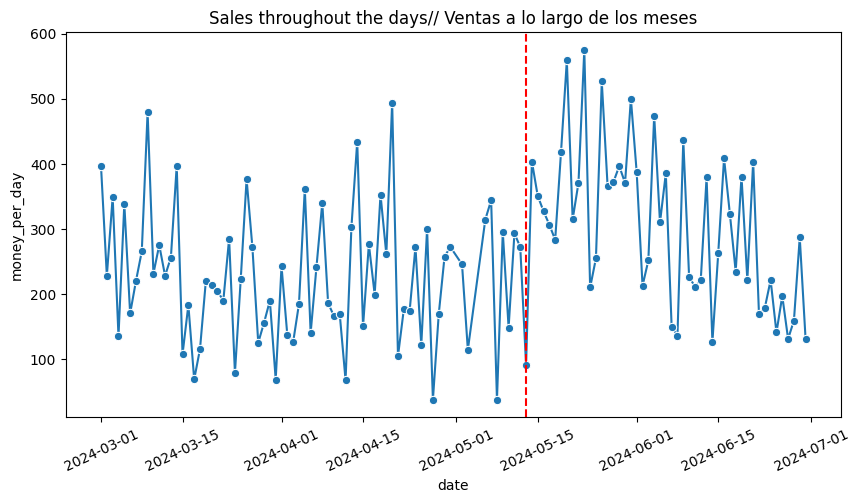

In [447]:
plt.figure(figsize=(10, 5))
sns.lineplot(data= df_groupped_by_date, x=df_groupped_by_date.index, y='money_per_day',  marker='o')
plt.xticks(rotation=25)
plt.axvline(x=pd.to_datetime('2024-05-13'),color = 'red', linestyle='--')
plt.title('Sales throughout the days// Ventas a lo largo de los meses')
plt.show()

**[ENG]**

- Sales are pretty variable during the first months with a trend that maintains until **2024-05-15**. On this date, there is an improvement in sales leading to an initial increace that then gradually decrease over time.

- The interesting thing about this  is the change in sales on that specif date that makes me wonder what decision the buissnes made to achieve this.

**[ESP]**
- Las ventas son bastante variables durante los meses con una tendencia que se se mantiene desde aproximadamente el comienzo hasta la fecha 2024-05-15. En esta existe un aumento de las ventas lo que genera en un principio una tendencia creciente que luego se mantiene y disminuye paulatinamente en el tiempo.
- Es interesante que este cambio en las ventas en esa fecha en especifico, lo que me hace preguntar que decisión tomó el negocio para lograr esto.

**Sales by hours**

In [448]:
df_by_hour_day = df.groupby("hour_day").agg({"money": "count"}).reset_index().rename(columns={'money':'Sales'})


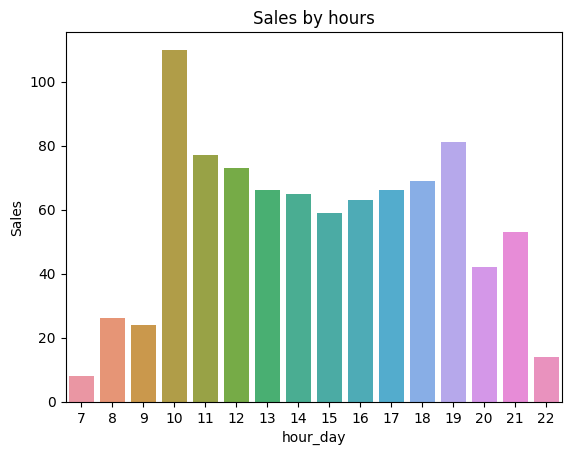

In [449]:
sns.barplot(df_by_hour_day, x="hour_day", y="Sales")
plt.title('Sales by hours')
plt.show()

**[ESP]**
- Las ventas se concentran en mayor medida a las 10 AM.
- Después de las 10 AM llega a un valle a las 3PM donde vuelve incrementar hasta las 19 PM

**Sales throughout the day**

In [450]:
df['time'] = df['datetime'].dt.floor('10T').dt.time

In [451]:
df_by_hour = df.groupby("time").agg({"money": ["count"]}).reset_index()
df_by_hour.columns = ["time", "count"]

In [452]:
df_by_hour

,time,count
0,07:40:00,5
1,07:50:00,3
2,08:00:00,4
3,08:10:00,4
4,08:20:00,5
...,...,...
87,22:10:00,1
88,22:20:00,1
89,22:30:00,4
90,22:40:00,2


In [453]:
day_hours = pd.DataFrame(
    np.unique(pd.date_range(
        start=pd.to_datetime("2024-01-01 07:00:00").replace(second=0, microsecond=0), 
        end=pd.to_datetime("2024-01-01 23:30:00").replace(second=0, microsecond=0), 
        freq='10T'
    ).time), columns=['time']
)

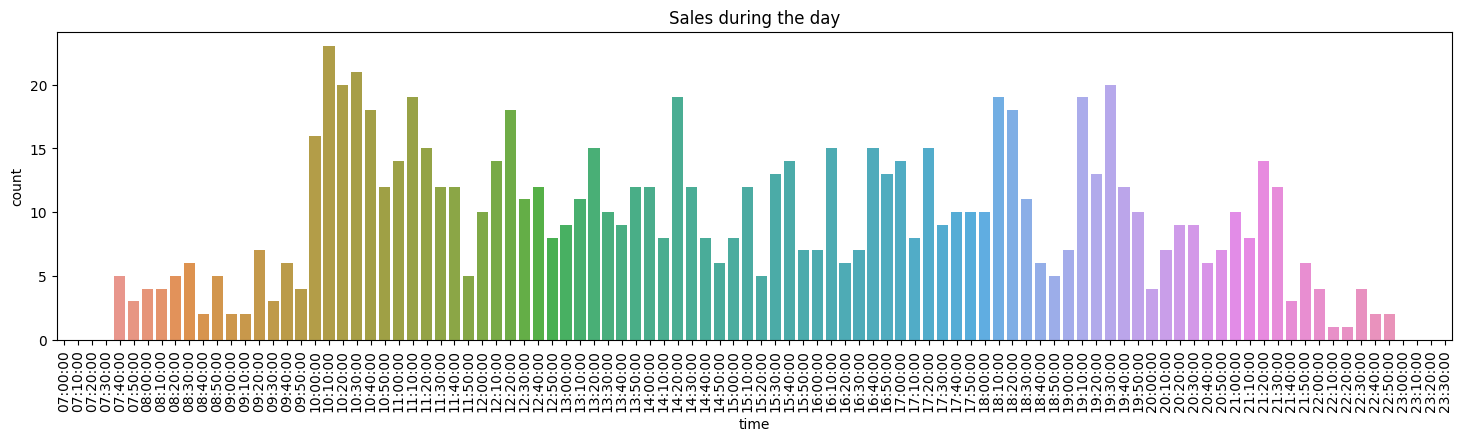

In [454]:
df_by_hour = pd.merge(day_hours, df_by_hour, on='time', how='left').fillna(0)

plt.figure(figsize=(18, 4))
sns.barplot(df_by_hour, x="time", y="count")
plt.xticks(rotation=90)
plt.title('Sales during the day')
plt.show()

**[ESP]**
- El establecimiento abre a las 7:30 y cierra a las 23:00
- Entre las 10 a 10:40 AM se concentra la mayor cantidad de ventas

### 3.2.1 [ENG] WHAT HAPPENED ON 2024-05-13 ? / [ESP] ¿ QUÉ PASO EL 13-05-2024 ?

In [455]:
# Dataframe before 2024-05-13
df_groupped_by_date_bf = df_groupped_by_date.loc[df_groupped_by_date.index < pd.to_datetime('2024-05-13')]

# Dataframe after 2024-05-13
df_groupped_by_date_af = df_groupped_by_date.loc[df_groupped_by_date.index >=pd.to_datetime('2024-05-13')]

In [456]:
# sales mean bf and af sales grow
sales_mean_bf = df_groupped_by_date_bf['money_per_day'].mean()
sales_mean_af = df_groupped_by_date_af['money_per_day'].mean()

In [457]:
# Percentage change in the quantity of daily sales
percentage_change = ((sales_mean_af - sales_mean_bf) / sales_mean_bf) * 100
print(f' En promedio las ventas totales por día aumentaron un {percentage_change:3f} %')

 En promedio las ventas totales por día aumentaron un 33.110355 %


**[ENG]**
- First of all, it is clear that the quantity of coffee sales per day grew by about 48%, which is significant for any business. However, we must not be misled by this, as on some days the number of sales is only 1.

- This leads us to the next question: What changed about the coffee shop?

**[ESP]**
- Lo primero que queda claro es que desde esa fecha en adelante las ventas en promedio aumentaron un 48 % lo que es significativo para cualquier negocio pero no hay que dejarse engañar considerando las cantidades vendidas algunos días pueden llegar a ser 1 cafe.
- La siguiente pregunta es que fue lo que cambiaron?

**Looking for any leads on the different coffee types to explain the growth in sales**

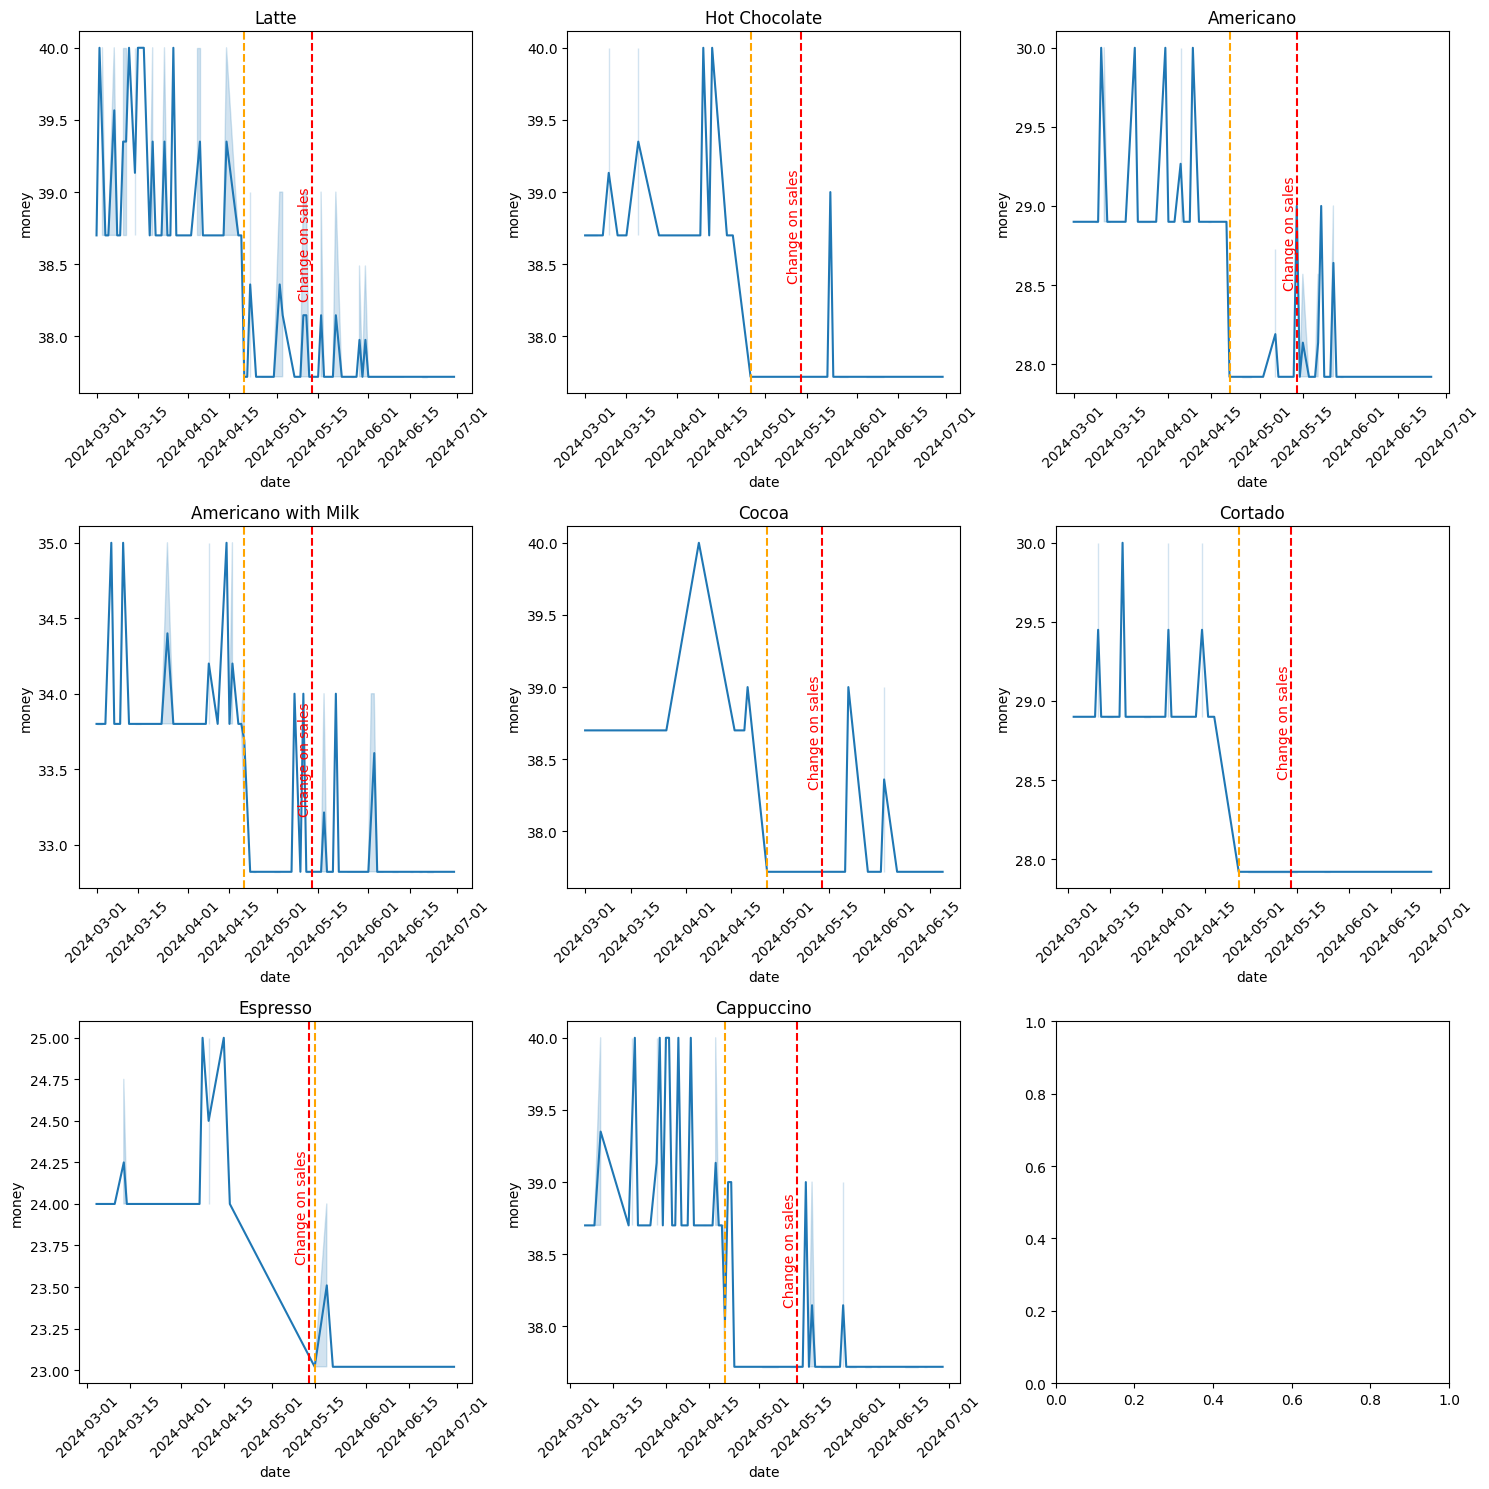

In [458]:

# Listing all coffe types
coffee_types = df['coffee_name'].unique()

# Getting the row length for the graphical layout
n_rows = (len(coffee_types)+2)//3

# Set up the graphics
fig, axes = plt.subplots(n_rows, 3, figsize=(15, n_rows*5))

# Dictionary to store the minimal price of each coffe
minimal = {}

# Dictionary to store days before the grow of seals ocurred

days_change = {}

# Making a for loop to plot all the data in the graphical layout
for i, coffee in enumerate(coffee_types):
    
    # Creating a new DataFrame for the current coffee type
    df_show = df[df['coffee_name']==coffee]
    
    # Storing minimal coffee price
    minimal[coffee] = df_show['money'].min()
    
    # Plotting the change in coffee value over time
    sns.lineplot(data = df_show, x='date', y='money', ax=axes[i//3, i%3])
    axes[i//3, i%3].axvline(x=pd.to_datetime('2024-05-13'),color = 'red', linestyle='--')
    
    axes[i // 3, i % 3].text(pd.to_datetime('2024-05-13'), df_show['money'].mean(), 'Change on sales', color='red', ha='right', va='bottom', rotation=90)
    
    days_change[coffee] = pd.to_datetime('2024-05-13') - df_show[df_show['money'] == df_show['money'].min()]['date'].min()
    axes[i//3, i%3].axvline(x=df_show[df_show['money'] == df_show['money'].min()]['date'].min(),color = 'orange', linestyle='--')

    axes[i//3, i%3].set_title(coffee)
    
    # Setting the xtick to be rotated
    plt.setp(axes[i // 3, i % 3].get_xticklabels(), rotation=45)

# Adjusting the layout to prevent overlap
plt.tight_layout()
plt.show()
    


**[ESP]**
- Esto es interesante ya que como podemos ver el cambio en las ventas del cafe esta previamente seguido de un descenso el precio de todos los tipos de cafes.
- Si bien no podemos decir extactamente que es por esta razon previamente solo mirando los datos parece ser que una vez bajaron los precios subieron las ventas

**When did the change in sales occur after each decrease in the different coffee types?**

In [459]:

for coffee_, days in days_change.items():
    if days.days > 0:
        print(f'After {days.days} days of decreasing the price of {coffee_} ocurred the grow on sales ')
        
    else:
        print(f'Before {np.abs(days.days)} days decreasing the price of {coffee_} ocurred the grow on sales')
        

After 23 days of decreasing the price of Latte ocurred the grow on sales 
After 17 days of decreasing the price of Hot Chocolate ocurred the grow on sales 
After 22 days of decreasing the price of Americano ocurred the grow on sales 
After 23 days of decreasing the price of Americano with Milk ocurred the grow on sales 
After 17 days of decreasing the price of Cocoa ocurred the grow on sales 
After 17 days of decreasing the price of Cortado ocurred the grow on sales 
Before 2 days decreasing the price of Espresso ocurred the grow on sales
After 23 days of decreasing the price of Cappuccino ocurred the grow on sales 


**[ESP]**

- In average after altered the coffe price the sales grew


**[ESP]**

- En promedio después de 20 días de modificar el precio de los cafe se vio una mejora en las ventas considerable

**How many coffees were sales after and before the sales grew?**

In [460]:
coffee_sold_bf = df_groupped_by_date_bf['coffee_count'].sum()
coffee_sold_af = df_groupped_by_date_af['coffee_count'].sum()
coffe_sold_amount_bf =df_groupped_by_date_bf['money_per_day'].sum()
coffe_sold_amount_af = df_groupped_by_date_af['money_per_day'].sum()

In [461]:
print(f'La cantidad de cafes vendidos antes de la bajada de precio de los cafes es de {coffee_sold_bf} y después es de {coffee_sold_af} ')

La cantidad de cafes vendidos antes de la bajada de precio de los cafes es de 462 y después es de 434 


**How many days did the shop need to achieve each quantity?**

In [462]:
coffe_cant_bf = df_groupped_by_date.loc[df_groupped_by_date.index < pd.to_datetime('2024-05-13'), :].shape[0]
coffe_cant_af = df_groupped_by_date.loc[df_groupped_by_date.index >= pd.to_datetime('2024-05-13'), :].shape[0]

In [463]:
print(f'Los {coffee_sold_bf} cafes vendidos antes de la bajada de precio se lograron en {coffe_cant_bf} días con un total en ventas de {coffe_sold_amount_bf} \nLos {coffee_sold_af} cafes vendidos después de la bajada se lograron en {coffe_cant_af} días con un total de ventas de {coffe_sold_amount_af}')

Los 462 cafes vendidos antes de la bajada de precio se lograron en 70 días con un total en ventas de 15836.72 
Los 434 cafes vendidos después de la bajada se lograron en 49 días con un total de ventas de 14756.220000000001


In [464]:
coffe_ratio_per_day_bf = coffee_sold_bf/coffe_cant_bf
coffe_ratio_per_day_af = coffee_sold_af/coffe_cant_af
print(f'Por lo tanto el ratio de venta de cafe por día antes de la bajada del precio de los cafe fue de {coffe_ratio_per_day_bf} cafes/dia y después fue de {coffe_ratio_per_day_af}')

Por lo tanto el ratio de venta de cafe por día antes de la bajada del precio de los cafe fue de 6.6 cafes/dia y después fue de 8.857142857142858


In [465]:
ratio_percent_by_day = ((coffe_ratio_per_day_af-coffe_ratio_per_day_bf)/coffe_ratio_per_day_bf)*100
print(f'Por lo que el ratio de ventas de cafe por día es de un {ratio_percent_by_day}')

Por lo que el ratio de ventas de cafe por día es de un 34.199134199134214


In [466]:
total_seals_amount_af = ((coffe_sold_amount_af - coffe_sold_amount_bf) / coffe_sold_amount_bf)*100
print(f'Después de la bajada de precios la mejora total en las ventas fue de {total_seals_amount_af:.2f} %')

Después de la bajada de precios la mejora total en las ventas fue de -6.82 %


### 3.2.2 WHICH DAY CONCENTRATE THE MOST SALES ? / [ESP] ¿ Que día se concentra la mayoría de las ventas?

Text(0.5, 1.0, 'Barplot days per sales')

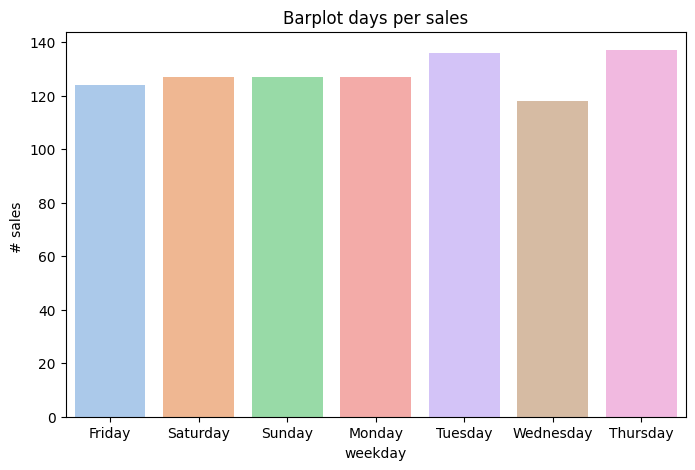

In [467]:
plt.figure(figsize=(8, 5 ))
sns.countplot(data=df, x='weekday', palette='pastel')
plt.ylabel('# sales ')
plt.title('Barplot days per sales')

**[ENG]**

- Thursday is the day with the most sales, and Tuesday is the second

**[ESP]**

- Está claro que los jueves y martes son los días que más se vende cafe en general.

### 3.2.3 [ENG] Do the cofee shop have regular clients ? / [ESP] ¿ El café tiene clientes regulares ?

In [468]:
# Number of different clients
df['card'].nunique()

338

In [469]:
daily_purchases = df.groupby(['card', 'date']).size().reset_index(name='daily_count')
total_purchases = daily_purchases.groupby('card')['daily_count'].sum().reset_index(name='total_purchases').sort_values(by= 'total_purchases' , ascending=False)
total_purchases[total_purchases['total_purchases']>=10]

,card,total_purchases
337,Cash,89
11,ANON-0000-0000-0012,76
8,ANON-0000-0000-0009,54
2,ANON-0000-0000-0003,22
96,ANON-0000-0000-0097,20
39,ANON-0000-0000-0040,17
0,ANON-0000-0000-0001,17
140,ANON-0000-0000-0141,16
23,ANON-0000-0000-0024,12
179,ANON-0000-0000-0180,12


**[ESP]**
- No podemos saber cuantas personas diferentes compraron cafe en efectivo
- El que más compró fue 76 cafes.
- Los clientes frecuentes son 10.(Si consideramos un cliente frecuente que compró más de 10 cafes)


### [ENG] 3.2.3 MOST FAVORITE COFFEES // [ESP] Los cafes más preferidos

In [470]:
coffee_top = df.groupby('coffee_name').size().reset_index(name='popularity').sort_values(by='popularity', ascending=False)
coffee_top

,coffee_name,popularity
1,Americano with Milk,203
7,Latte,187
2,Cappuccino,164
0,Americano,133
4,Cortado,85
6,Hot Chocolate,63
5,Espresso,35
3,Cocoa,26


<Axes: xlabel='popularity', ylabel='coffee_name'>

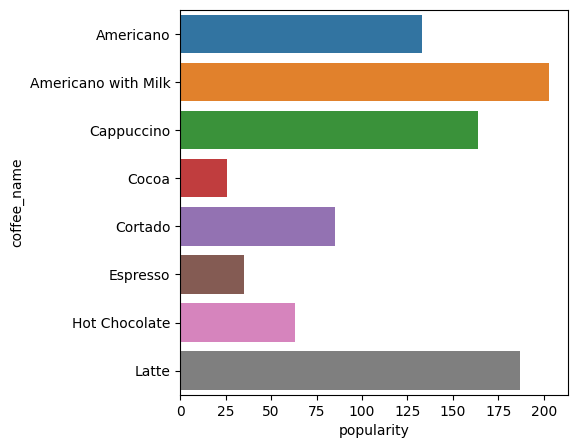

In [471]:
plt.figure(figsize=(5,5))
sns.barplot(data= coffee_top, y='coffee_name', x='popularity')


### 3.2.4 [ENG]  CASH TYPE PREFERENCE // [ESP] TIPO DE PAGO PREFERIDO

array([<Axes: ylabel='cash_type'>], dtype=object)

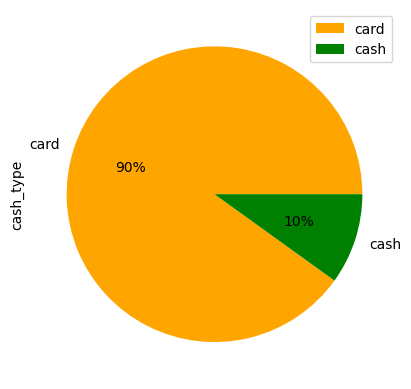

In [472]:
cash_prefer = df.groupby('cash_type').agg({'cash_type':'count'})
cash_prefer.plot(kind='pie', subplots=True,  autopct='%1.0f%%', colors=["orange", "green"])

In [509]:
 df.groupby('cash_type').agg({'cash_type':'count'})

,cash_type
cash_type,
card,807
cash,89


- El método más escogido es tarjeta y en menor medida efectivo.

In [511]:
grouped_cash_type = df.groupby('cash_type').agg({'money':'sum'})
grouped_cash_type

,money
cash_type,
card,27406.94
cash,3186.00


In [515]:
total_money = grouped_cash_type['money'].sum()

grouped_cash_type['percentage'] = (grouped_cash_type['money'] / total_money) * 100


In [516]:
grouped_cash_type

,money,percentage
cash_type,,
card,27406.94,89.585833
cash,3186.00,10.414167


**CONCLUSIONES**

- La maquina espendedora de cafe comienza a funcionar tipo 7:30 y termina de funcionar a las 23 PM.
- En mayo de 2024 se dan las ventas más altas de los meses registrados.
- En las semanas 2024-04-15/2024-04-2021 comienza una bajada en las ventas que llega su peak en la semana 2024-04-29/2024-05-15 donde alcanza su peor cifra de ventas.
- Las horas de mas ventas son las 10 AM, posterior a eso desciende paulatinamente hasta que vuelve a aumentar a las 18:00 PM
- El 13-05-2024, ocurrio un aumento en las ventas que podria estar ligado a la mayor baja de precio de los cafes según los datos registrados.
- Los cafe mas vendidos son Latte, americano con leche y cappucino
- El tipo de pago mas común es tarjeta el que tambien se coindice con la mayor cantidad de venta.